In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Forward process

In [22]:
x = tf.linspace(-10.0, 10.0, 100)
x = tf.dtypes.cast(x, tf.float32)
y = (0.3 * np.sin(0.5 * np.pi * x) + 
     0.4 * np.sin(0.3 * np.pi * x + 1) + 
     0.2 * np.exp(-0.5 * (x - 3) ** 2) + 
     0.2 * np.exp(-0.5 * (x + 3) ** 2))
y = y / y.max()  # Normalize to [0, 1]
y = tf.convert_to_tensor(y, dtype=tf.float32)
y = tf.reshape(y, (100))

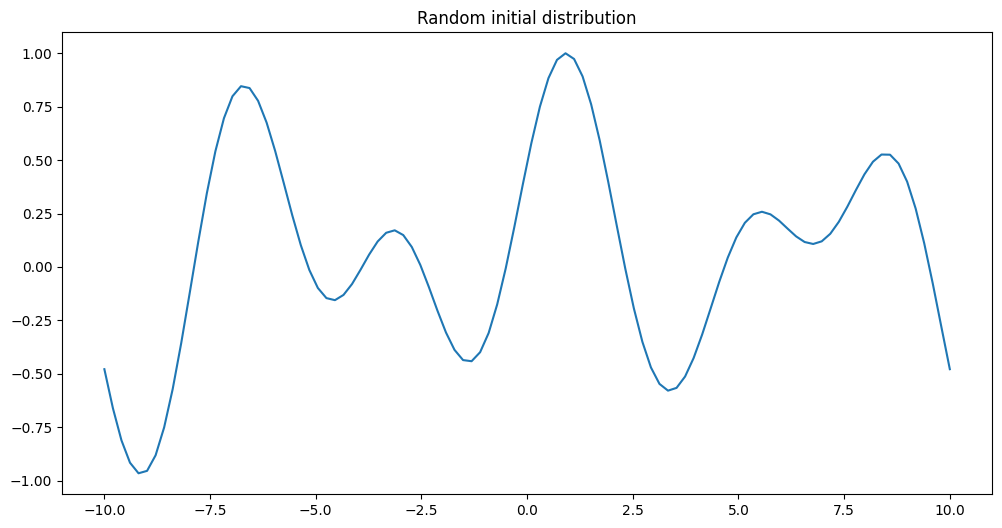

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="sin(x)")
plt.title("Random initial distribution")
plt.show()

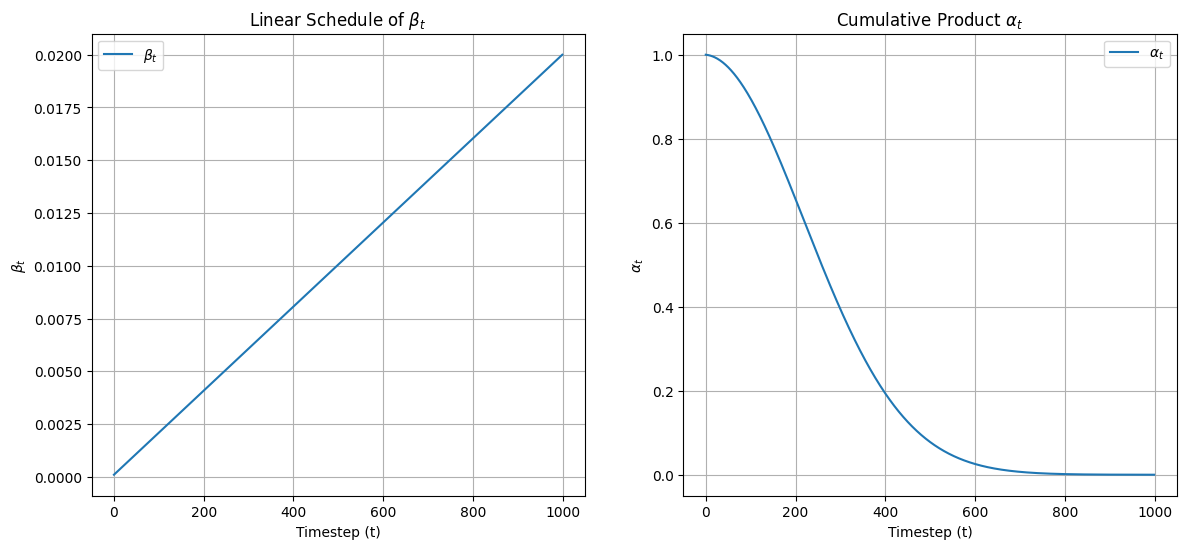

In [26]:
T = 1000
beta_t = tf.linspace(0.0001, 0.02, T)
# Calculate cumulative product of (1 - beta_t) to get alpha_t
alphas = 1 - beta_t
alpha_prod = np.cumprod(alphas)  # Cumulative product

# Plotting the beta_t and alpha_prod values
plt.figure(figsize=(14, 6))

# Plot beta_t
plt.subplot(1, 2, 1)
plt.plot(range(1000), beta_t, label=r'$\beta_t$')
plt.xlabel('Timestep (t)')
plt.ylabel(r'$\beta_t$')
plt.title(r'Linear Schedule of $\beta_t$')
plt.grid(True)
plt.legend()

# Plot alpha_t
plt.subplot(1, 2, 2)
plt.plot(range(T), alpha_prod, label=r'$\alpha_t$')
plt.xlabel('Timestep (t)')
plt.ylabel(r'$\alpha_t$')
plt.title(r'Cumulative Product $\alpha_t$')
plt.grid(True)
plt.legend()

plt.show()


In [31]:
def forward_process_1d(x0, betas, T):
    xts = []
    xt = x0    
    for t in range(1, T + 1):
        mean = tf.sqrt(1.0 - betas[t-1]) * xt
        noise = tf.random.normal(shape=x0.shape, mean=betas[t-1], stddev=1.0)
        xt = mean + tf.sqrt(betas[t-1]) * noise
        xts.append(xt.numpy())  # Store numpy array for plotting
    return xts

In [32]:
# Run the forward process
yt_steps = forward_process_1d(y, beta_t, T)

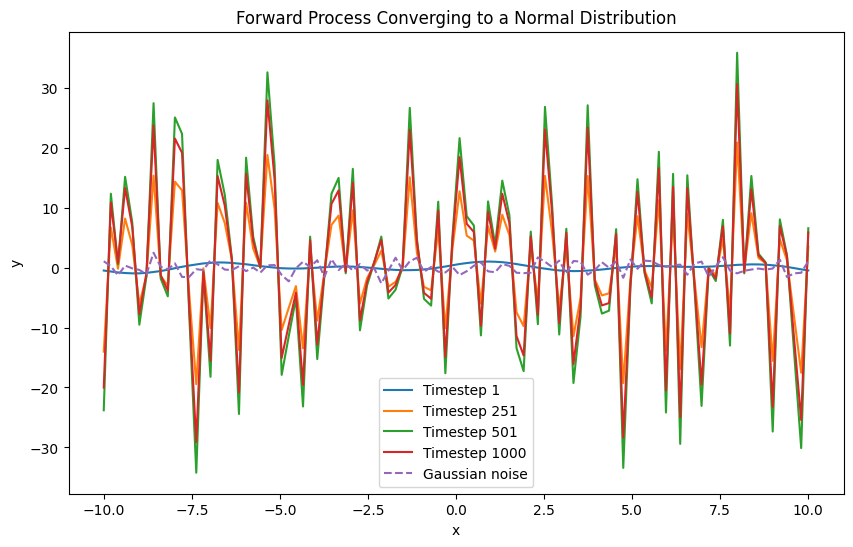

In [33]:
# Visualization
timesteps_to_plot = [0, T//4, T//2, T-1]

plt.figure(figsize=(10, 6))
for i, t in enumerate(timesteps_to_plot):
    plt.plot(x, yt_steps[t], label=f'Timestep {t+1}')
plt.plot(x, np.random.normal(0, 1, len(x)), label='Gaussian noise', linestyle='dashed')
plt.legend()
plt.title('Forward Process Converging to a Normal Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [34]:
tf.random.normal(shape = y.shape, mean = )


<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-1.3544159 ,  0.7045493 ,  0.03666191,  0.86918795,  0.43842277,
       -0.53439844, -0.07710292,  1.5658046 , -0.1012345 , -0.2744975 ,
        1.420466  ,  1.2609465 , -0.4364091 , -1.963399  , -0.06452482,
       -1.056841  ,  1.0019135 ,  0.6735137 ,  0.06987705, -1.4077919 ,
        1.0278524 ,  0.2797411 , -0.01347954,  1.8451811 ,  0.9706112 ,
       -1.0242516 , -0.6544423 , -0.29738778, -1.3240397 ,  0.28785658,
       -0.87579006, -0.08856997,  0.6921164 ,  0.842157  , -0.06378508,
        0.9280078 , -0.6039788 , -0.17669262,  0.04221032,  0.29037958,
       -0.2960446 , -0.21134192,  0.01063002,  1.5165399 ,  0.27305746,
       -0.29925638, -0.36523244,  0.61883324, -1.0130817 ,  0.28291693,
        1.2132235 ,  0.46988976,  0.37944326, -0.66640246,  0.60545963,
        0.19181171,  0.80458266,  0.47690514, -0.7812124 , -0.996891  ,
        0.3314997 , -0.5445253 ,  1.5222509 ,  0.593032  , -0.63509274,
        0.370356